# BICS Results Analysis

### How to load the datasets

- Download the result CSVs from here
: https://drive.google.com/drive/folders/1Jgq_prg6apvcDncjQp83B5ErDM5z8zGc?usp=drive_link
- Create a `/single_bug_test` directory under `/content` (default path on Colab) directory
- Upload the result CSVs into the `/single_bug_test` directory

In [504]:
import pandas as pd

df_gpt4o = pd.read_csv('single_bug_test/result_gpt4o.csv')
df_codestral = pd.read_csv('single_bug_test/result_codestral.csv')
df_gpt35turbo = pd.read_csv('single_bug_test/result_gpt35turbo.csv')
df_codeqwen_few_shot = pd.read_csv('single_bug_test/result_codeqwen15_few_shot.csv')
df_codeqwen_zero_shot = pd.read_csv('single_bug_test/result_codeqwen15_zero_shot.csv')
dfs = {
    'gpt4o': df_gpt4o,
    'codestral': df_codestral,
    'gpt35turbo': df_gpt35turbo,
    'codeqwen_few_shot': df_codeqwen_few_shot,
    'codeqwen_zero_shot': df_codeqwen_zero_shot,
}
labels = {
    'gpt4o': 'GPT-4o',
    'codestral': 'Codestral',
    'gpt35turbo': 'GPT-3.5-Turbo',
    'codeqwen_few_shot': 'CodeQwen1.5 (Few-Shot)',
    'codeqwen_zero_shot': 'CodeQwen1.5 (Zero-Shot)',
}

In [505]:
dfs_info = {}

for name, df in dfs.items():
    bug_line_number_match_count = (df['bug_line_number'] == df['pred_bug_line_number']).sum()
    bug_type_match_count = (df['bug_type'] == df['pred_bug_type']).sum()
    all_matches = (df['bug_line_number'] == df['pred_bug_line_number']) & (df['bug_type'] == df['pred_bug_type'])
    bug_line_number_value_count_dict = df['pred_bug_line_number'].value_counts().to_dict()
    bug_type_value_count_dict = df['pred_bug_type'].value_counts().to_dict()
    all_match_count = all_matches.sum()
    if name not in dfs_info:
        dfs_info[name] = {}
    dfs_info[name]['label'] = labels[name]
    dfs_info[name]['bug_line_number_match_count'] = bug_line_number_match_count
    dfs_info[name]['bug_type_match_count'] = bug_type_match_count
    dfs_info[name]['all_match_count'] = all_match_count
    dfs_info[name]['bug_line_number_value_count_dict'] = bug_line_number_value_count_dict
    dfs_info[name]['bug_type_value_count_dict'] = bug_type_value_count_dict

In [506]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_graph_bln_match(data_string):
    """
    Plots a bar graph from a dictionary of string labels and numeric counts with gradient blue colors.

    Parameters:
    data_string (dict): A dictionary with string keys and numeric values.
    """
    labels = list(data_string.keys())
    counts = list(data_string.values())

    def get_fontsize(n):
        if n < 10:
            return 12
        elif n < 20:
            return 9
        elif n < 50:
            return 6
        else:
            return 5

    # Normalize counts to range between 0.1 and 1 to avoid white color
    norm_counts = (counts - np.min(counts)) / (np.max(counts) - np.min(counts)) * 0.7 + 0.3

    # Create a colormap
    colormap = plt.cm.Blues
    colors = colormap(norm_counts)

    plt.figure(figsize=(2 * len(labels), 6))
    bars = plt.bar(labels, counts, color=colors)
    plt.xlabel('Model Names', fontsize=12)
    plt.ylabel('Bug Line Number Match Count', fontsize=12)
    plt.title(f'Bug Line Number Match Count Per Model')
    plt.xticks(fontsize=get_fontsize(len(labels)), rotation=45)  # Rotate labels by 45 degrees

    # Add counts above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=9)

    plt.show()

In [507]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_graph_bt_match(data_string):
    """
    Plots a bar graph from a dictionary of string labels and numeric counts with gradient blue colors.

    Parameters:
    data_string (dict): A dictionary with string keys and numeric values.
    """
    labels = list(data_string.keys())
    counts = list(data_string.values())

    def get_fontsize(n):
        if n < 10:
            return 12
        elif n < 20:
            return 9
        elif n < 50:
            return 6
        else:
            return 5

    # Normalize counts to range between 0.1 and 1 to avoid white color
    norm_counts = (counts - np.min(counts)) / (np.max(counts) - np.min(counts)) * 0.7 + 0.3

    # Create a colormap
    colormap = plt.cm.Blues
    colors = colormap(norm_counts)

    plt.figure(figsize=(2 * len(labels), 6))
    bars = plt.bar(labels, counts, color=colors)
    plt.xlabel('Model Names', fontsize=12)
    plt.ylabel('Bug Type Match Count', fontsize=12)
    plt.title(f'Bug Type Match Count Per Model')
    plt.xticks(fontsize=get_fontsize(len(labels)), rotation=45)  # Rotate labels by 45 degrees

    # Add counts above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=9)

    plt.show()

In [508]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_graph_all_match(data_string):
    """
    Plots a bar graph from a dictionary of string labels and numeric counts with gradient blue colors.

    Parameters:
    data_string (dict): A dictionary with string keys and numeric values.
    """
    labels = list(data_string.keys())
    counts = list(data_string.values())

    def get_fontsize(n):
        if n < 10:
            return 12
        elif n < 20:
            return 9
        elif n < 50:
            return 6
        else:
            return 5

    # Normalize counts to range between 0.1 and 1 to avoid white color
    norm_counts = (counts - np.min(counts)) / (np.max(counts) - np.min(counts)) * 0.7 + 0.3

    # Create a colormap
    colormap = plt.cm.Blues
    colors = colormap(norm_counts)

    plt.figure(figsize=(2 * len(labels), 6))
    bars = plt.bar(labels, counts, color=colors)
    plt.xlabel('Model Names', fontsize=12)
    plt.ylabel('Both Match Count', fontsize=12)
    plt.title(f'Both Match (Bug Line Number & Bug Type) Count Per Model')
    plt.xticks(fontsize=get_fontsize(len(labels)), rotation=45)  # Rotate labels by 45 degrees

    # Add counts above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=9)

    plt.show()

In [509]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_bln_count(data_numeric, label):
    """
    Plots a histogram from a dictionary of numeric labels and numeric counts.

    Parameters:
    data_numeric (dict): A dictionary with numeric keys and numeric values.
    label (str): The label for the x-axis.
    """
    # Filter out keys above 10 from data_numeric
    data_numeric = {k: v for k, v in data_numeric.items() if k <= 10}

    labels = list(data_numeric.keys())
    counts = list(data_numeric.values())

    # Normalize counts to range between 0.1 and 1 to avoid white color
    norm_counts = (counts - np.min(counts)) / (np.max(counts) - np.min(counts)) * 0.5 + 0.5

    # Create a colormap
    colormap = plt.cm.Blues
    colors = colormap(norm_counts)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, counts, color=colors, width=0.8, align='center')
    plt.xlabel('Bug Line Number', fontsize=12)
    plt.ylabel('Value Count', fontsize=12)
    plt.title(f'Bug Line Number vs. Value Count ({label})')
    plt.xticks(labels)  # Ensure all labels are shown

    # Add counts above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=9)

    plt.show()

In [510]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_graph_bt_count(data_string, label):
    """
    Plots a bar graph from a dictionary of string labels and numeric counts with gradient blue colors.

    Parameters:
    data_string (dict): A dictionary with string keys and numeric values.
    label (str): The label for the x-axis.
    """
    # Filter out values below 5
    bug_types = ['missing_colon', 'missing_parenthesis', 'missing_quotation', 'missing_comma', 'mismatched_quotation', 'mismatched_bracket', 'keywords_as_identifier']
    data_string = {k: v for k, v in data_string.items() if k in bug_types}
    labels = list(data_string.keys())
    counts = list(data_string.values())

    def get_fontsize(n):
        if n < 10:
            return 12
        elif n < 20:
            return 9
        elif n < 50:
            return 6
        else:
            return 5

    # Normalize counts to range between 0.1 and 1 to avoid white color
    norm_counts = (counts - np.min(counts)) / (np.max(counts) - np.min(counts)) * 0.5 + 0.5

    # Create a colormap
    colormap = plt.cm.Blues
    colors = colormap(norm_counts)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, counts, color=colors)
    plt.xlabel('Bug Type', fontsize=12)
    plt.ylabel('Value Count', fontsize=12)
    plt.title(f'Bug Type vs. Value Count ({label})')
    plt.xticks(fontsize=get_fontsize(len(labels)), rotation=45)  # Rotate labels by 45 degrees

    # Add counts above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=9)

    plt.show()

# Bug Line Number Retrieval vs Bug Type

- Codestral is on-par with GPT-3.5-Turbo in terms of performance
- CodeQwen1.5 (Few-Shot) struggles on retrieving both the bug line number and bug type, hinting that the model likely does not possess robust debugging capabilities at long context length
- *Note that there are 1/7 chance of getting the bug type right (100~105 correct out of 725) if the model is guessing randomly*

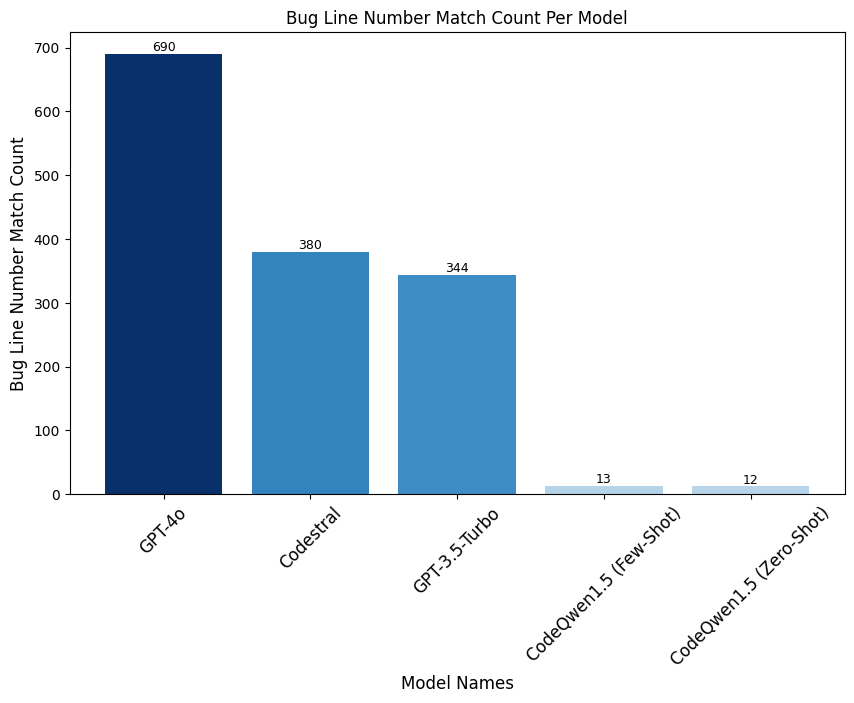

In [511]:
bln_match_dict = {}
for name, df in dfs.items():
    bln_match_dict[dfs_info[name]['label']] = dfs_info[name]['bug_line_number_match_count']
plot_bar_graph_bln_match(bln_match_dict)

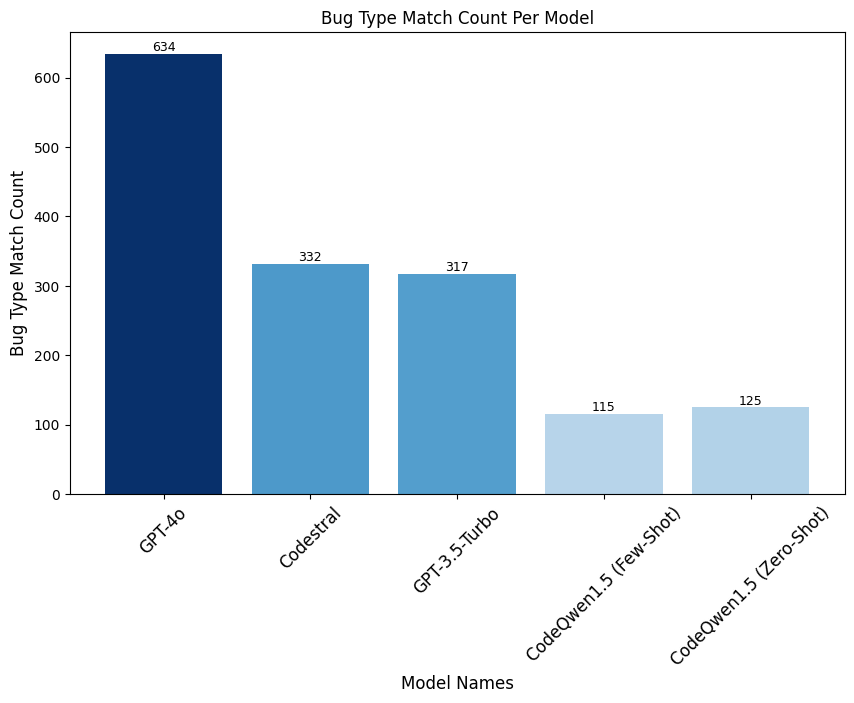

In [512]:
bt_match_dict = {}
for name, df in dfs.items():
    bt_match_dict[dfs_info[name]['label']] = dfs_info[name]['bug_type_match_count']
plot_bar_graph_bt_match(bt_match_dict)

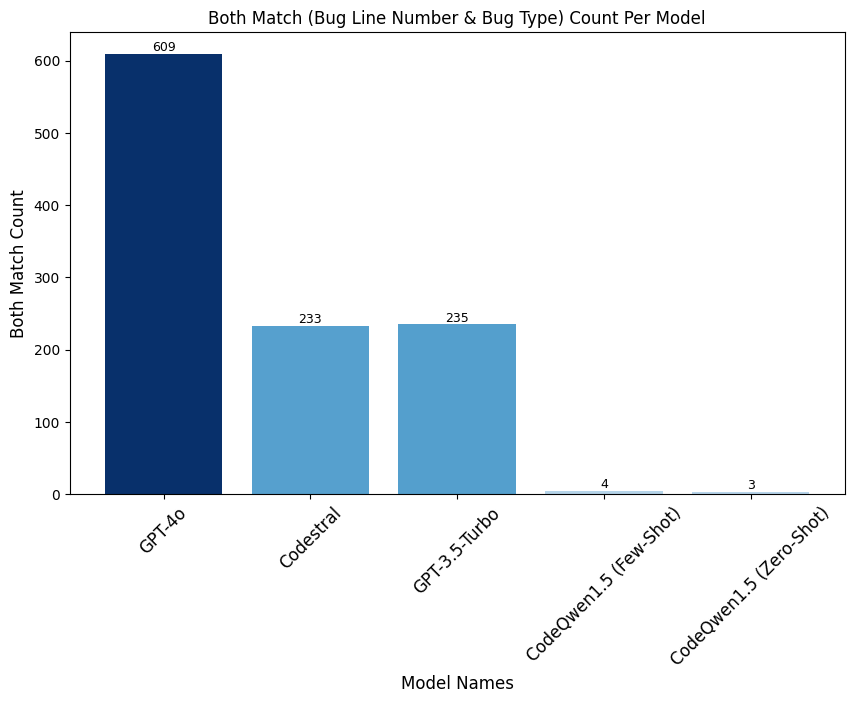

In [513]:
all_match_dict = {}
for name, df in dfs.items():
    all_match_dict[dfs_info[name]['label']] = dfs_info[name]['all_match_count']
plot_bar_graph_all_match(all_match_dict)

## Bug Line Number Histogram

- The first example in few-shot examples has an answer of `4, missing_parenthesis`, which makes less powerful models more prone to hallucinate `4` as the line number
- GPT-4o and Codestral are not affected by the few-shot examples, while GPT-3.5-Turbo and CodeQwen1.5 (Few-Shot) are succeptible to hallucination
- *As expected, once removing the few-shot examples, the favoratism towards line number=4 goes away for CodeQwen1.5 model*

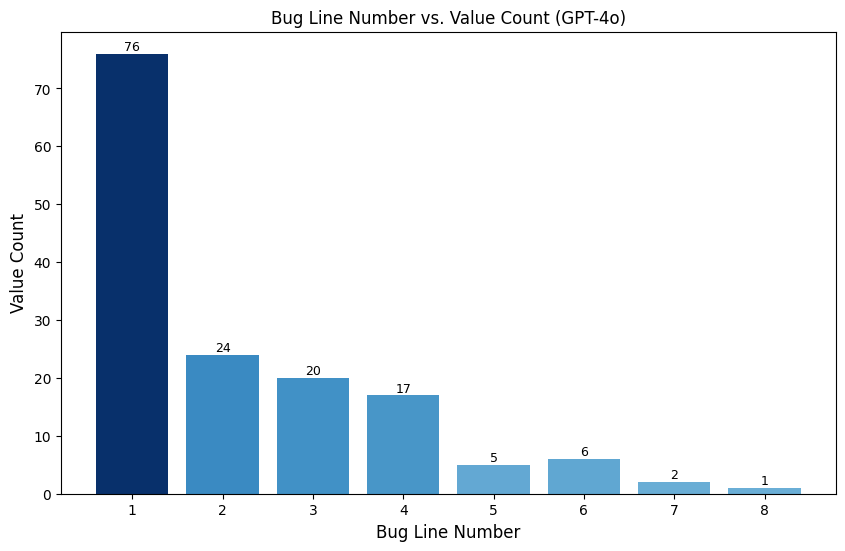

In [514]:
plot_histogram_bln_count(dfs_info['gpt4o']['bug_line_number_value_count_dict'], dfs_info['gpt4o']['label'])

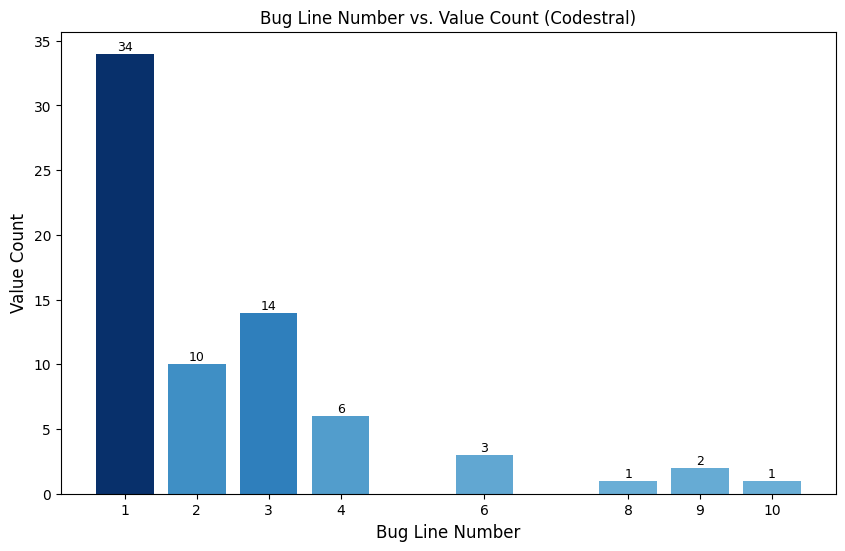

In [515]:
plot_histogram_bln_count(dfs_info['codestral']['bug_line_number_value_count_dict'], dfs_info['codestral']['label'])

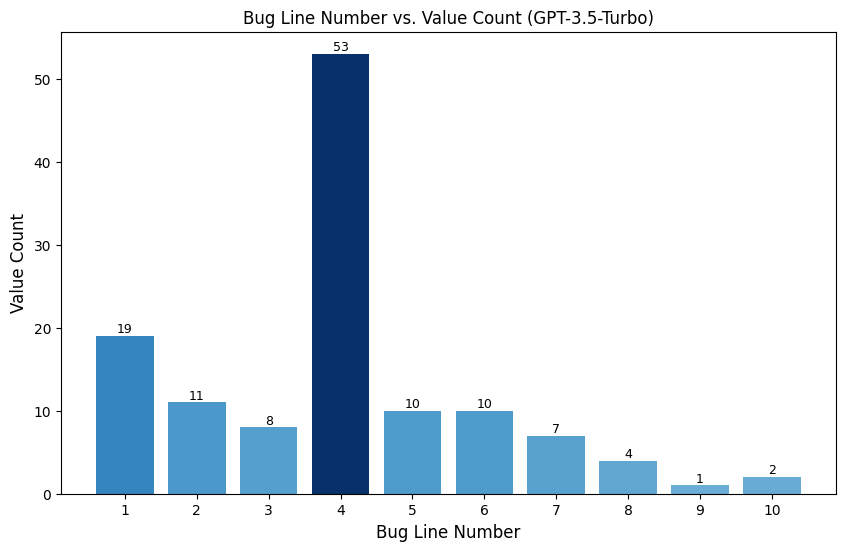

In [516]:
plot_histogram_bln_count(dfs_info['gpt35turbo']['bug_line_number_value_count_dict'], dfs_info['gpt35turbo']['label'])

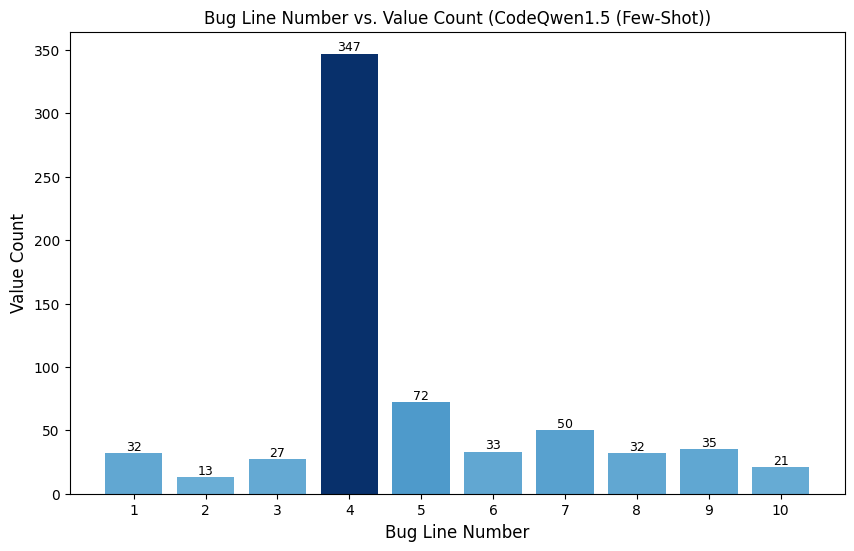

In [517]:
plot_histogram_bln_count(dfs_info['codeqwen_few_shot']['bug_line_number_value_count_dict'], dfs_info['codeqwen_few_shot']['label'])

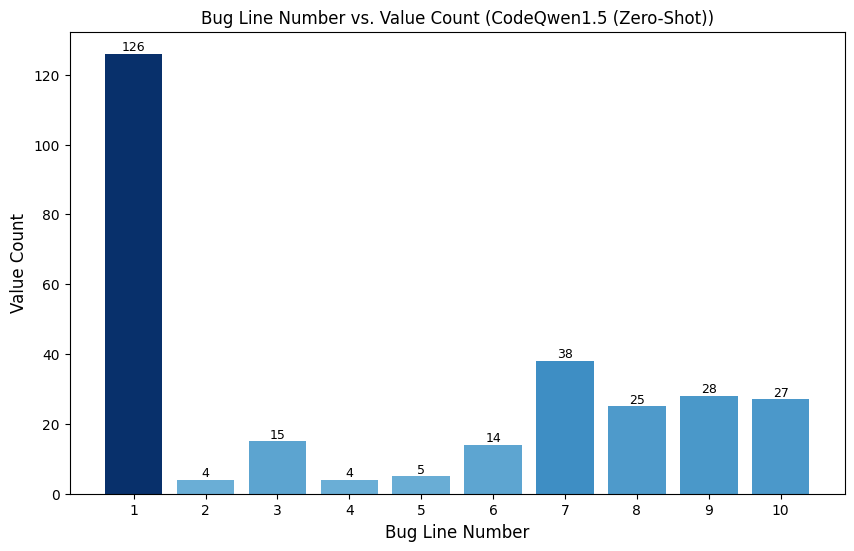

In [518]:
plot_histogram_bln_count(dfs_info['codeqwen_zero_shot']['bug_line_number_value_count_dict'], dfs_info['codeqwen_zero_shot']['label'])

# Bug Type Bar Graph

- Less powerful a model is, it is likely favour certain bug types over other (in the actual benchmark, the likelihood of a bug type being selected is the same)
- As noticed by the CodeQwen1.5 (Few-Shot) vs. CodeQwen1.5 (Zero-Shot), removing few-shot examples seems to also lessen favoritism towards certain bug types

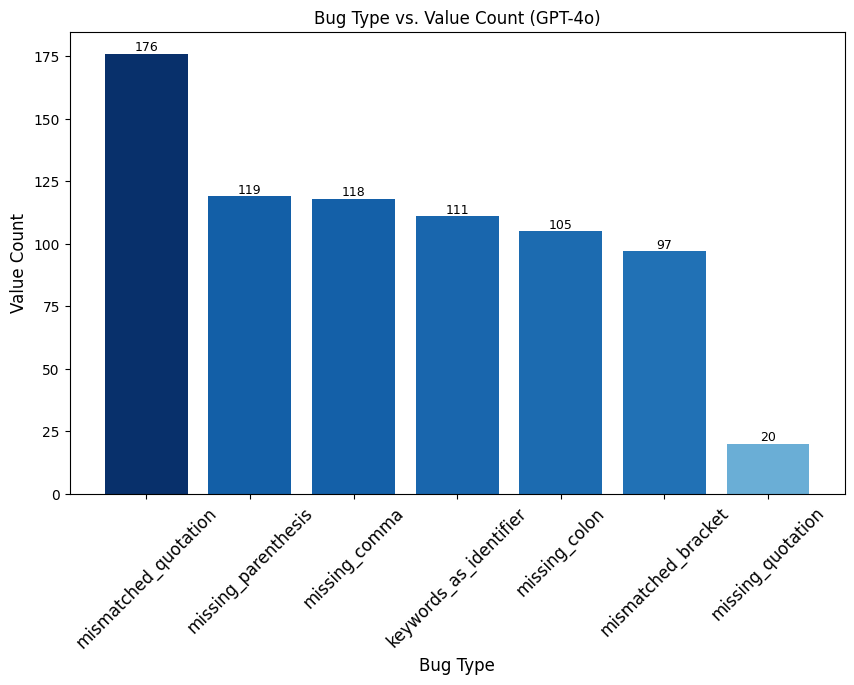

In [519]:
plot_bar_graph_bt_count(dfs_info['gpt4o']['bug_type_value_count_dict'], dfs_info['gpt4o']['label'])

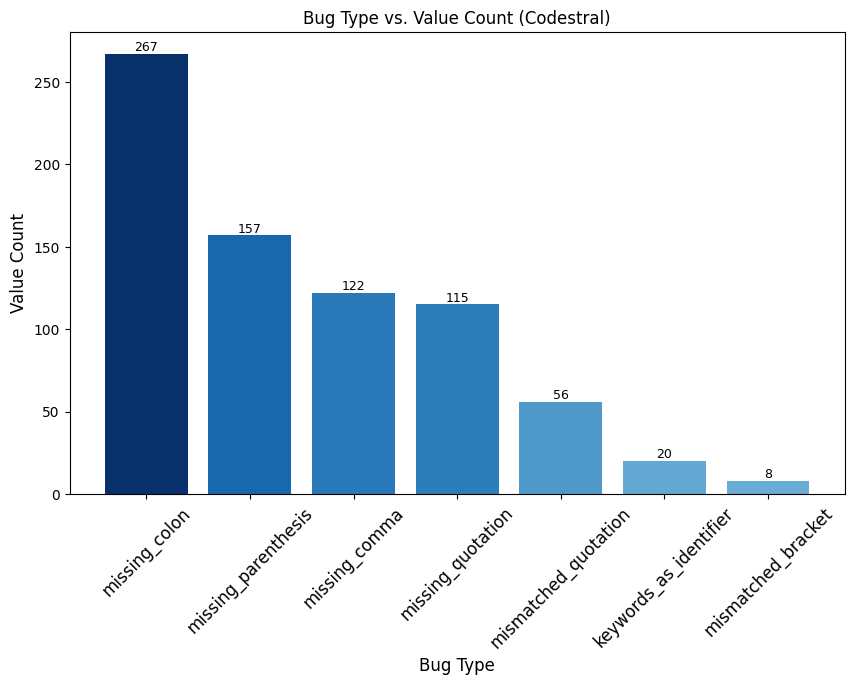

In [520]:
plot_bar_graph_bt_count(dfs_info['codestral']['bug_type_value_count_dict'], dfs_info['codestral']['label'])

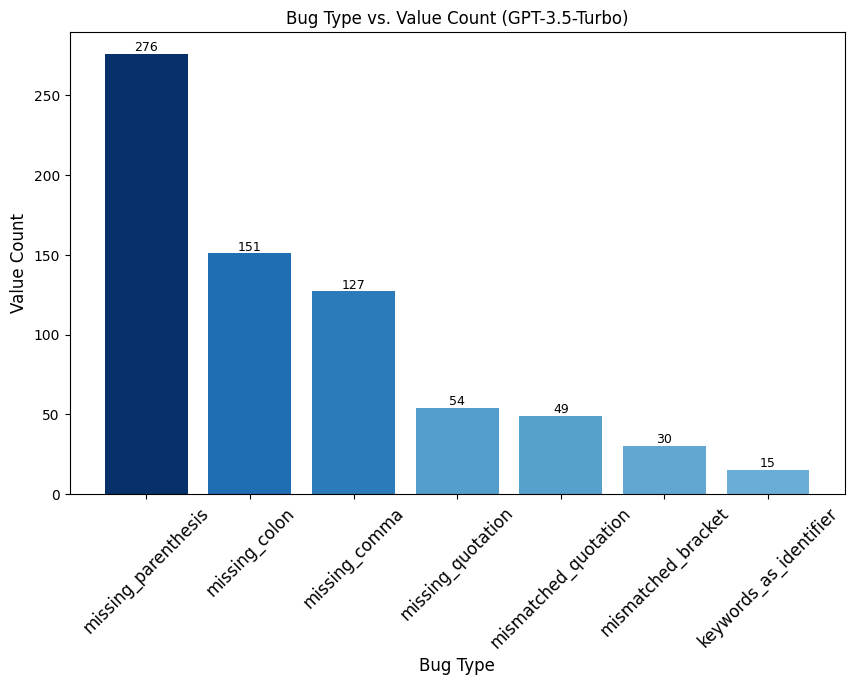

In [521]:
plot_bar_graph_bt_count(dfs_info['gpt35turbo']['bug_type_value_count_dict'], dfs_info['gpt35turbo']['label'])

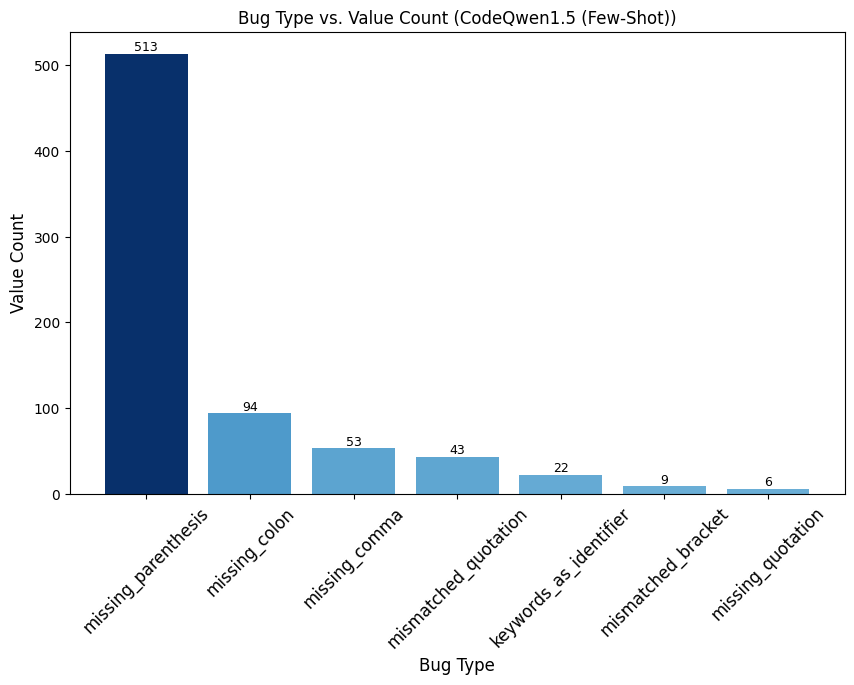

In [522]:
plot_bar_graph_bt_count(dfs_info['codeqwen_few_shot']['bug_type_value_count_dict'], dfs_info['codeqwen_few_shot']['label'])

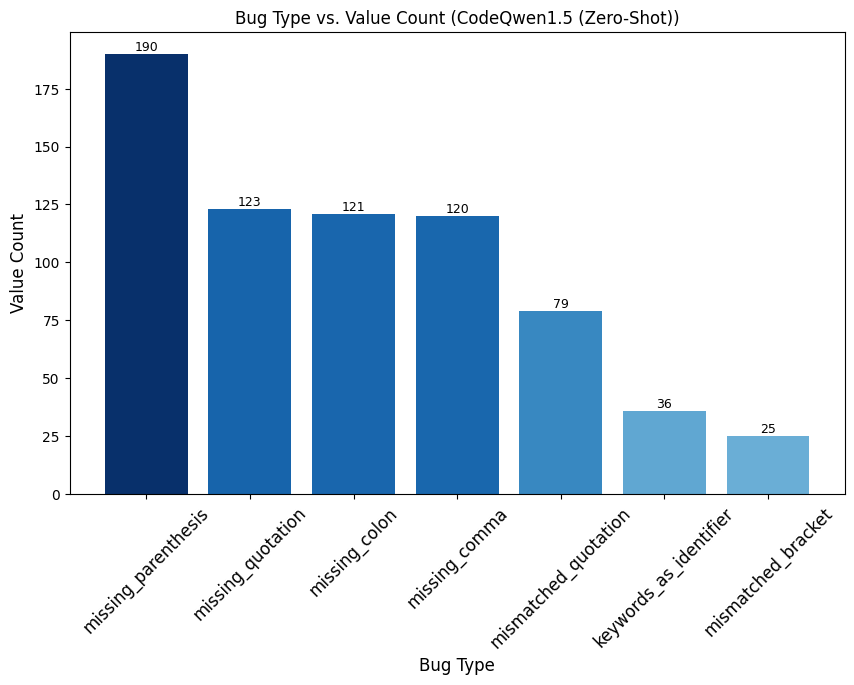

In [523]:
plot_bar_graph_bt_count(dfs_info['codeqwen_zero_shot']['bug_type_value_count_dict'], dfs_info['codeqwen_zero_shot']['label'])

# Final Analysis

- Codestral showed a very impressive performance for a 22B parameter model, with similar accuracy compared to GPT-3.5-Turbo
- CodeQwen1.5 greatly struggled on the benchmark, with accuracy equivalent to randomly guessing the answer (also had very high hallucination rate during the experiment)
- Removing the few-shot examples for smaller models can lessen hallucination, but it won't affect the overall accuracy